### Pipeline for analyzing input data

The idea is to simply input the folder containing the processed data and then run a bunch of functions from plotting.py to plot the data and also display and save tables of the input data that can be useful for analysis and for the report. The plotted data should be saved and displayed and so should the tables.

This should deal exlusively with input data while the output data is analyzed in the notebook analyze_results.ipynb

In [30]:
# Import python modules
import os
import sys
import pandas as pd

# Determine the absolute path to the src directory (one level up from notebooks)
module_path = os.path.abspath(os.path.join("..", "src"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [59]:
# Import custom modules
import plotting
import utils

In [32]:
SAVE_FIGURES = True
SAVE_TABLES = True

In [33]:
PROCESSED_DATA_FOLDER = os.path.join(os.path.dirname(os.getcwd()), "data", "processed")
data_folder_name = "elec_s_37_ES_PT"
data_folder = os.path.join(PROCESSED_DATA_FOLDER, data_folder_name)
output_folder = os.path.join(data_folder, "analyzed_data")
if not os.path.exists(output_folder):
    if SAVE_FIGURES or SAVE_TABLES:
        os.makedirs(output_folder)
demand_output_folder = (
    None if not SAVE_FIGURES else os.path.join(output_folder, "demand")
)
if not os.path.exists(demand_output_folder):
    if SAVE_FIGURES or SAVE_TABLES:
        os.makedirs(demand_output_folder)
capacity_factors_output_folder = (
    None if not SAVE_FIGURES else os.path.join(output_folder, "capacity_factors")
)
if not os.path.exists(capacity_factors_output_folder):
    if SAVE_FIGURES or SAVE_TABLES:
        os.makedirs(capacity_factors_output_folder)

In [34]:
# read data
(
    batteries,
    branches,
    capacity_factors,
    generators,
    generator_costs,
    hourly_demand,
    nodes,
) = utils.load_processed_data(data_folder).values()

## Grid Overview

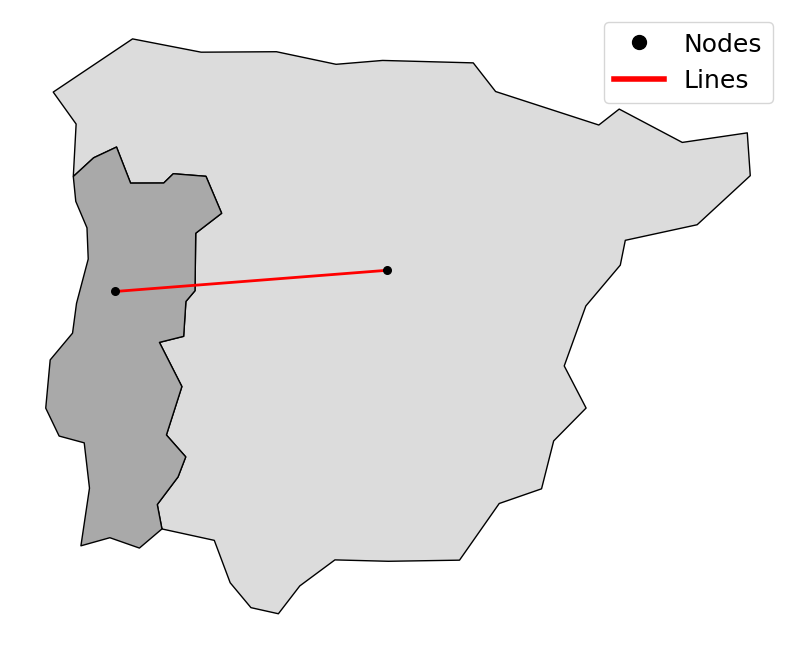

In [35]:
grid_simple_savepath = (
    "" if not SAVE_FIGURES else os.path.join(output_folder, "grid_simple.png")
)
plotting.plot_buses_and_lines(nodes, branches, savepath=grid_simple_savepath)

Excluded city with missing bus coordinates: Murcia
Excluded city with missing bus coordinates: Bilbao
Excluded city with missing bus coordinates: Zaragoza
Excluded city with missing bus coordinates: Seville
Excluded city with missing bus coordinates: Lugo
Excluded city with missing bus coordinates: Madrid
Excluded city with missing bus coordinates: Valencia
Excluded city with missing bus coordinates: Salamanca
Excluded city with missing bus coordinates: Barcelona
Excluded city with missing bus coordinates: Porto
Excluded city with missing bus coordinates: Lisbon


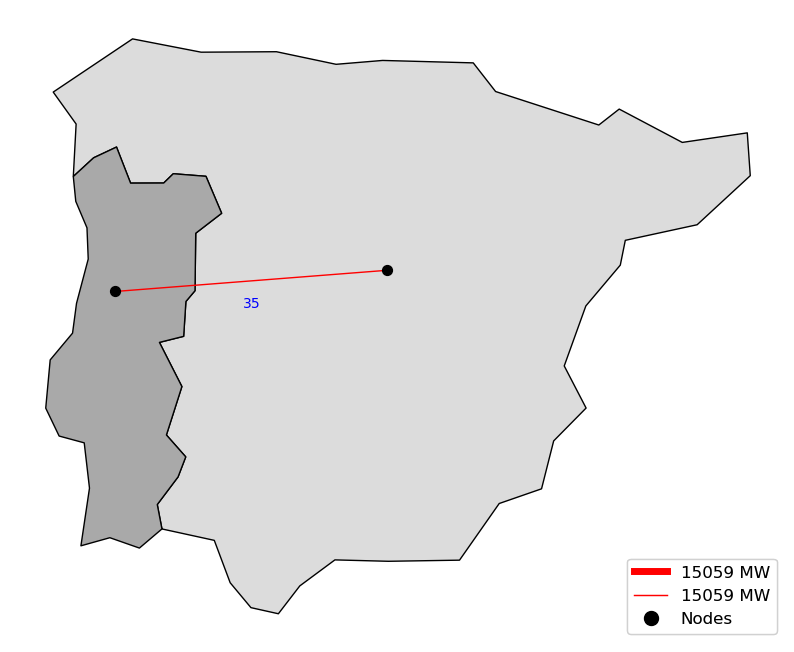

In [36]:
grid_with_ids_savepath = (
    "" if not SAVE_FIGURES else os.path.join(output_folder, "grid_with_ids.png")
)
plotting.plot_base_network_with_lineIDs_and_city_text(
    nodes, branches, savepath=grid_with_ids_savepath
)

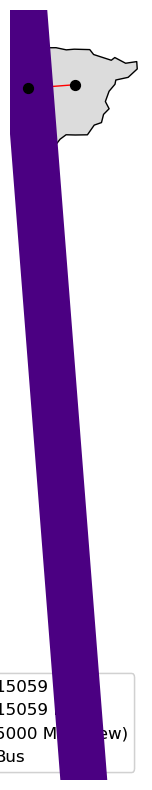

Transmission lines with additional capacity potential of 5000 MW


In [37]:
grid_with_line_sizes_and_extensions_savepath = (
    ""
    if not SAVE_FIGURES
    else os.path.join(output_folder, "grid_with_line_sizes_and_extensions.png")
)
plotting.plot_sized_lines_with_extensions(
    nodes, branches, savepath=grid_with_line_sizes_and_extensions_savepath
)

3
3


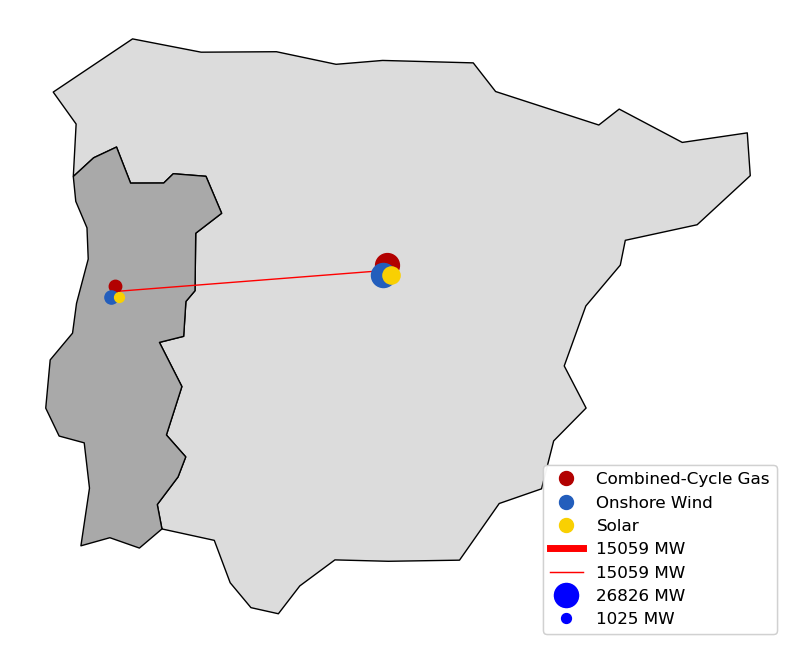

In [38]:
grid_sized_generators_and_lines_savepath = (
    ""
    if not SAVE_FIGURES
    else os.path.join(output_folder, "grid_sized_generators_and_lines.png")
)
plotting.plot_sized_generators_and_lines(
    nodes, branches, generators, savepath=grid_sized_generators_and_lines_savepath
)

### Transmission Lines

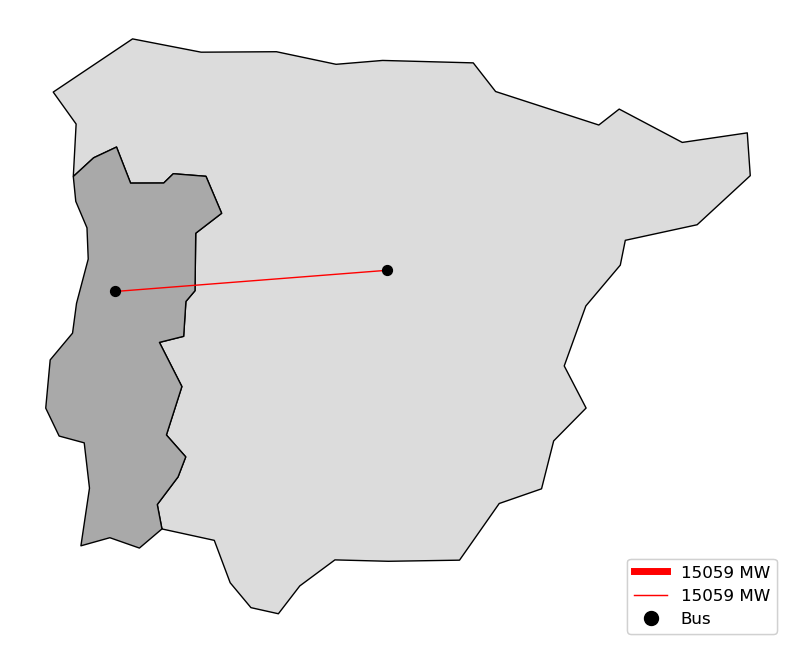

In [39]:
grid_lines_with_sizes_savepath = (
    "" if not SAVE_FIGURES else os.path.join(output_folder, "grid_lines_with_sizes.png")
)
plotting.plot_sized_branches(nodes, branches, savepath=grid_lines_with_sizes_savepath)

In [40]:
table_branches_overview_savepath = (
    ""
    if not SAVE_TABLES
    else os.path.join(output_folder, "table_branches_overview.csv")
)
plotting.get_branches_overview_table(
    branches, savepath=table_branches_overview_savepath
)

### Demand 

Excluded city with missing bus coordinates: Bilbao
Excluded city with missing bus coordinates: Zaragoza
Excluded city with missing bus coordinates: Seville
Excluded city with missing bus coordinates: Lugo
Excluded city with missing bus coordinates: Madrid
Excluded city with missing bus coordinates: Valencia
Excluded city with missing bus coordinates: Salamanca
Excluded city with missing bus coordinates: Barcelona
Excluded city with missing bus coordinates: Lisbon
Average daily demand [GWh per day] per area


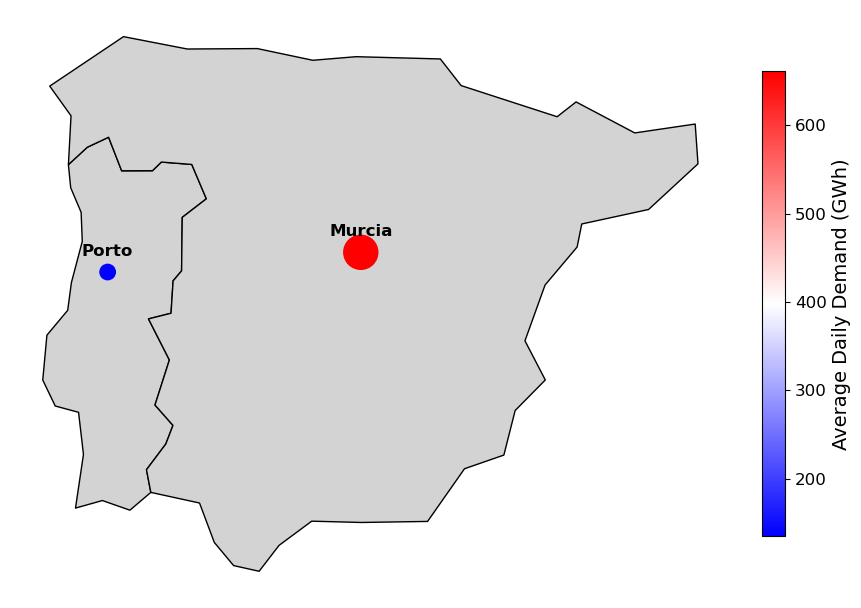

In [41]:
plotting.plot_demand_network_daily(
    nodes, hourly_demand, savefolder=demand_output_folder
)

Average hourly demand [MWh/h] per area


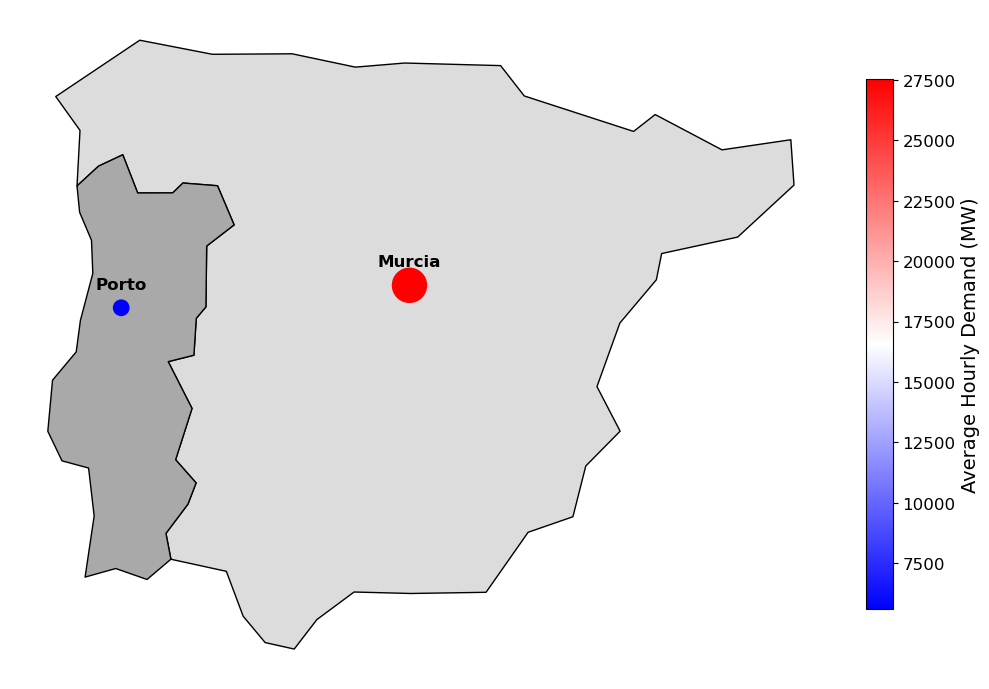

In [42]:
plotting.plot_demand_network_hourly(
    nodes, hourly_demand, savefolder=demand_output_folder
)

Normalized Average Hourly Load for Spain and Portugal


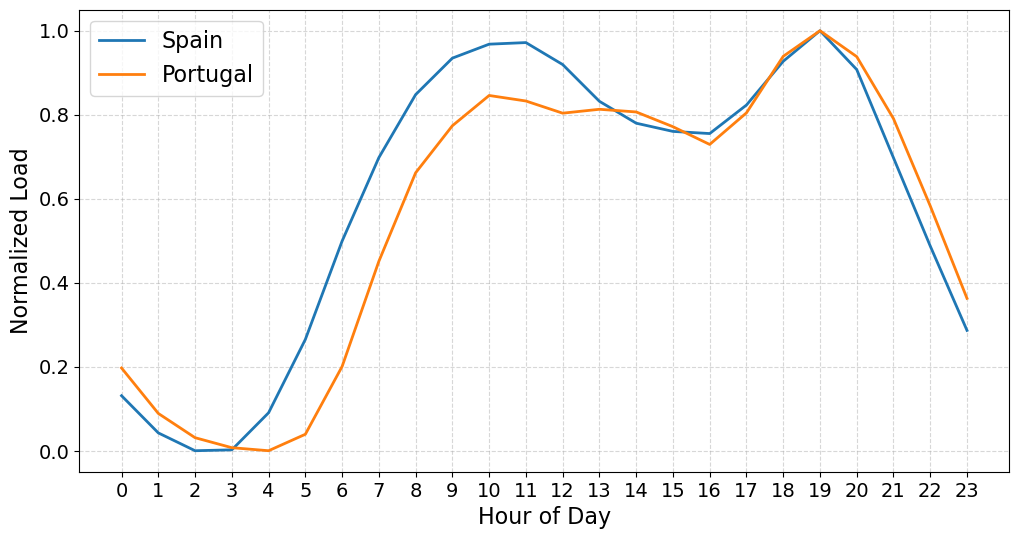

In [43]:
plotting.plot_normalized_hourly_load_by_country(
    hourly_demand, savefolder=demand_output_folder
)

Average Hourly Demand with Standard Deviation


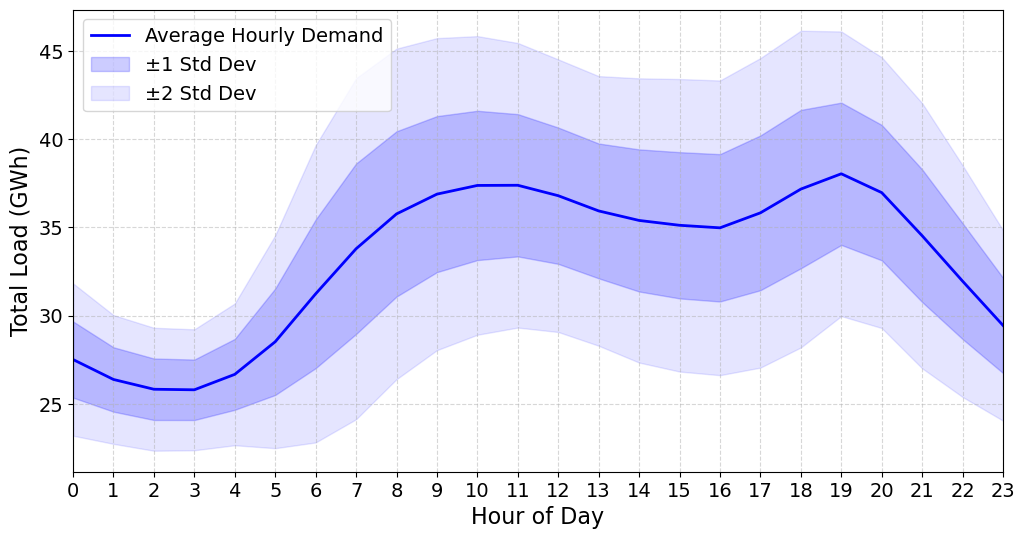

In [44]:
plotting.plot_aggregated_average_hourly_demand_with_stds(
    hourly_demand, savefolder=demand_output_folder
)

Average hourly load per month all demand nodes


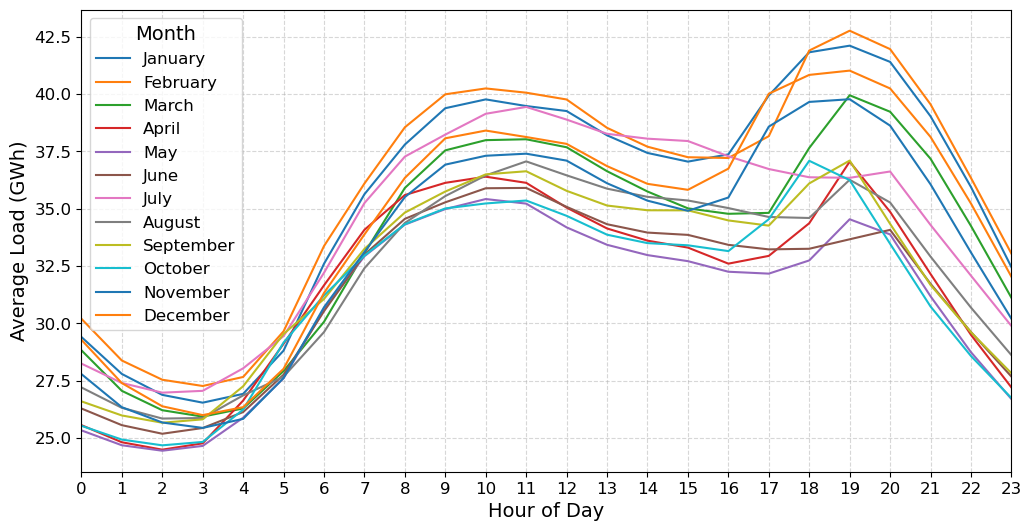

In [45]:
plotting.plot_average_hourly_demand_each_month_aggragated(
    hourly_demand, savefolder=demand_output_folder
)

In [46]:
# plotting.plot_average_hourly_demand_each_month_at_node(
#     hourly_demand,
#     plotting.city_to_node["Bilbao"],
#     savefolder=demand_output_folder,
# )

Average hourly load per season all demand nodes


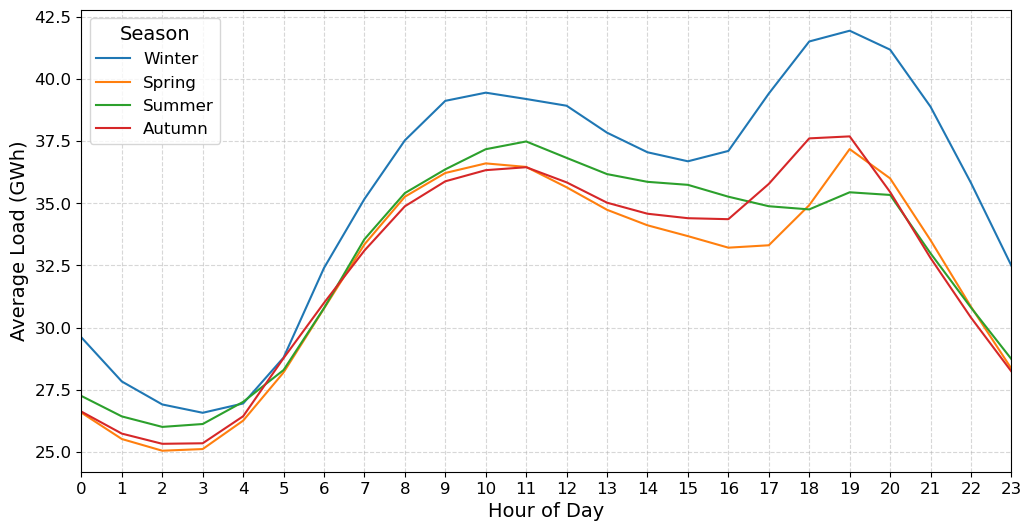

In [47]:
plotting.plot_average_hourly_demand_each_season_aggragated(
    hourly_demand, savefolder=demand_output_folder
)

### Generators Tables

In [48]:
table_generators_overview_savepath = (
    None
    if not SAVE_TABLES
    else os.path.join(output_folder, "table_generators_overview.csv")
)
print(
    plotting.get_generators_overview_table(
        generators, table_generators_overview_savepath
    )
)

         Installed Capacity [MW]  Number of Generators
carrier                                               
CCGT                30450.332000                     2
onwind              32039.503345                     2
solar               12707.019273                     2


In [49]:
table_generators_costs_and_emissions_savepath = (
    None
    if not SAVE_TABLES
    else os.path.join(output_folder, "table_generators_costs_and_emissions.csv")
)


plotting.get_generators_cost_and_emissions_table(
    generators, table_generators_costs_and_emissions_savepath
)

,Marginal Cost (€/MWh),CO2 Emissions (ton/MWh),Annualized Investment Cost (€/MW),CO2 Cost (€/MWh),Total Marginal Cost (€/MWh)
carrier,,,,,
CCGT,39.824539,0.2,99027.729293,17.0,56.824539
onwind,0.015000,0.0,96085.888020,0.0,0.015000
solar,0.010000,0.0,35602.071244,0.0,0.010000


### Generators Plots

Excluded city with missing coordinates: Bilbao
Excluded city with missing coordinates: Zaragoza
Excluded city with missing coordinates: Seville
Excluded city with missing coordinates: Lugo
Excluded city with missing coordinates: Madrid
Excluded city with missing coordinates: Valencia
Excluded city with missing coordinates: Salamanca
Excluded city with missing coordinates: Barcelona
Excluded city with missing coordinates: Lisbon


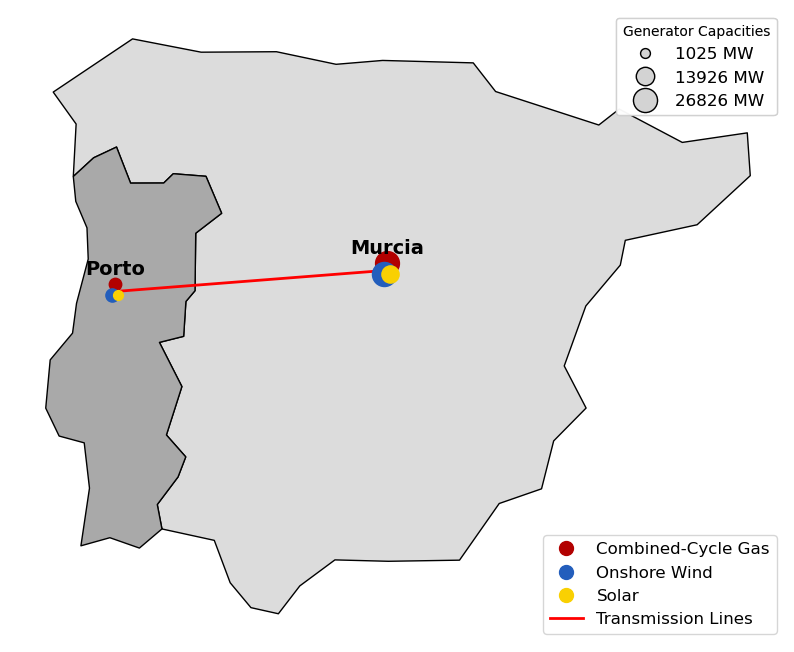

In [50]:
grid_sized_generators_savepath = (
    "" if not SAVE_FIGURES else os.path.join(output_folder, "grid_sized_generators.png")
)
plotting.plot_sized_generators(
    nodes, branches, generators, savepath=grid_sized_generators_savepath
)

Generators by city and type installed capacity (nominal) in GW


<Figure size 1800x900 with 0 Axes>

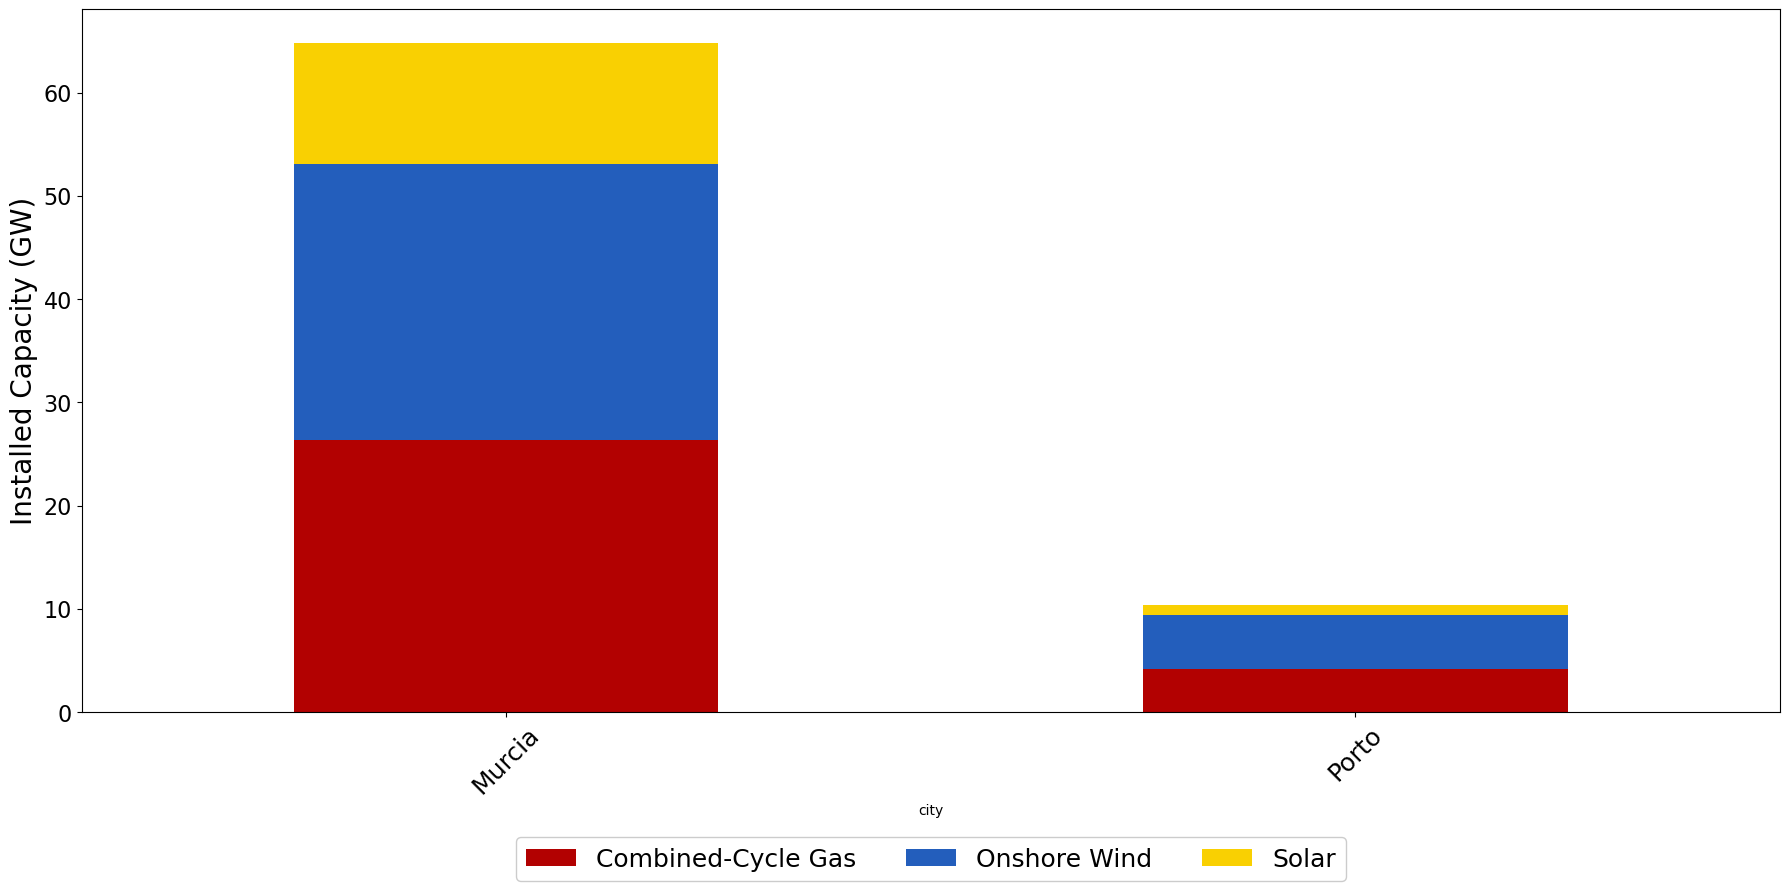

In [51]:
bar_installed_capacity_savepath = (
    ""
    if not SAVE_FIGURES
    else os.path.join(output_folder, "bar_generators_installed_capacity.png")
)
plotting.plot_installed_capacity_bar_chart(
    generators, savepath=bar_installed_capacity_savepath
)

Generators by city and type effective capacity in GW


<Figure size 1800x900 with 0 Axes>

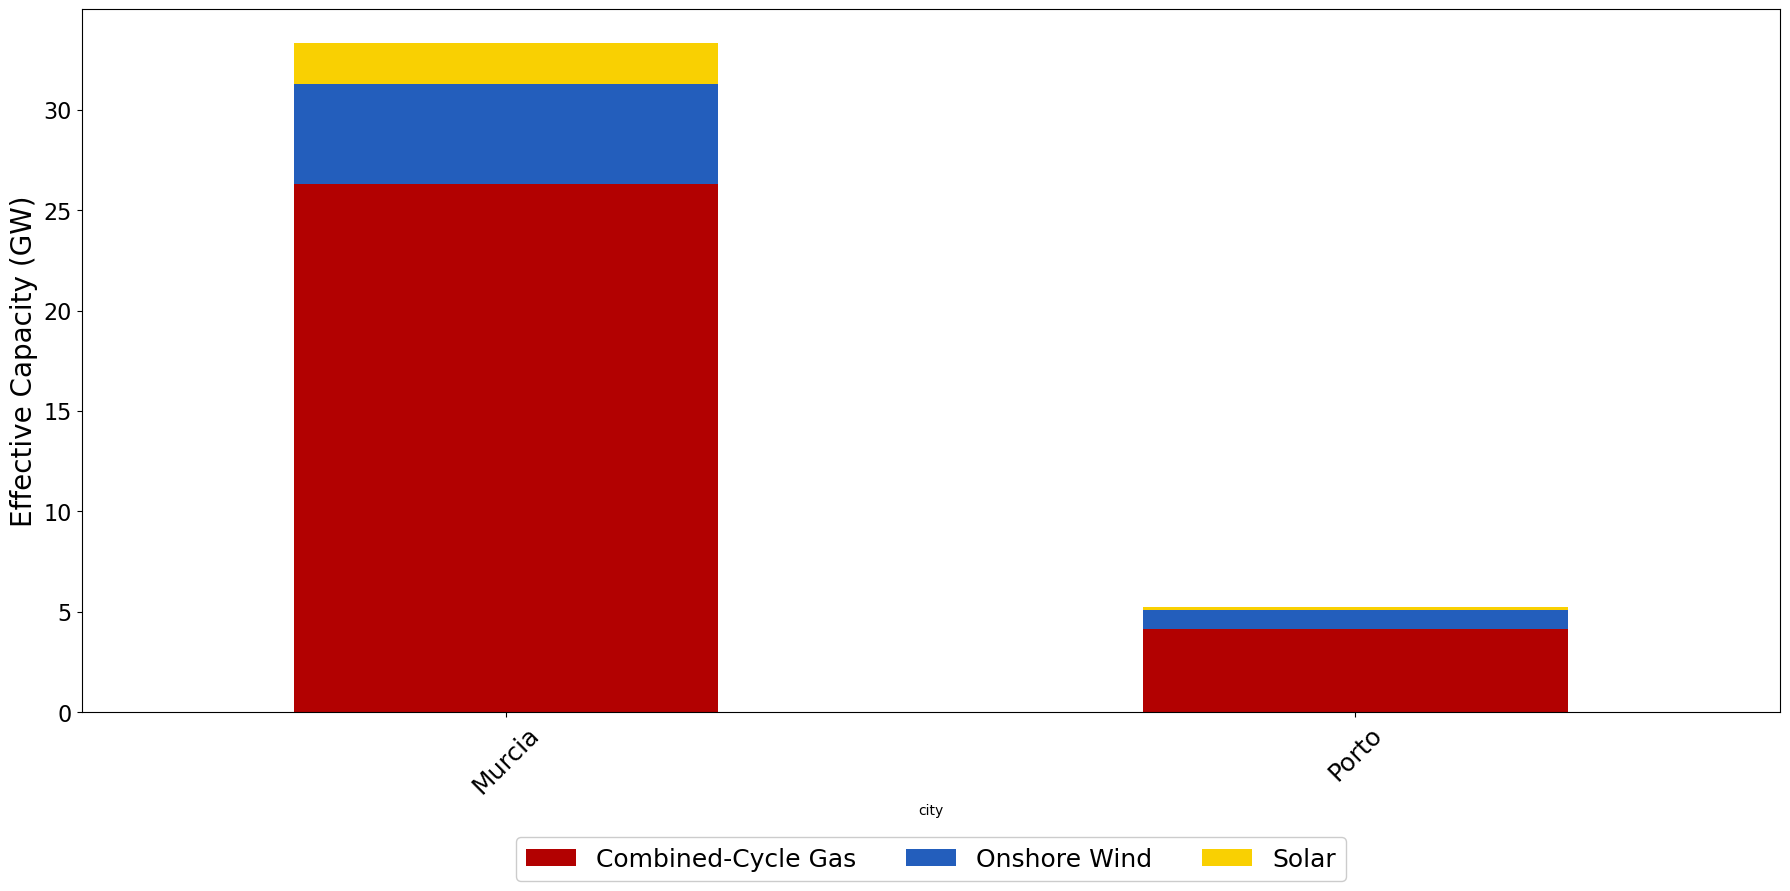

In [52]:
bar_effective_capacity_generators_savepath = (
    ""
    if not SAVE_FIGURES
    else os.path.join(output_folder, "bar_effective_capacity_generators.png")
)
plotting.plot_effective_capacity_generators_bar_chart(
    generators, capacity_factors, savepath=bar_effective_capacity_generators_savepath
)

### Batteries

Excluded city with missing coordinates: Bilbao
Excluded city with missing coordinates: Zaragoza
Excluded city with missing coordinates: Seville
Excluded city with missing coordinates: Lugo
Excluded city with missing coordinates: Madrid
Excluded city with missing coordinates: Valencia
Excluded city with missing coordinates: Salamanca
Excluded city with missing coordinates: Barcelona
Excluded city with missing coordinates: Lisbon


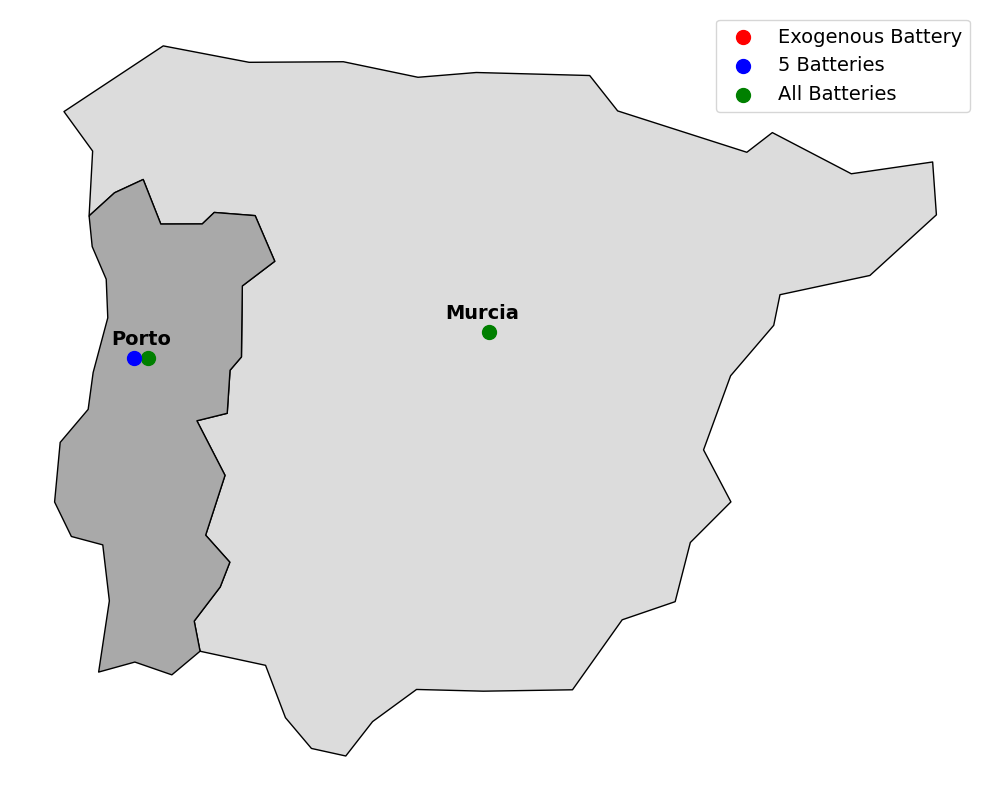

In [53]:
grid_battery_cases_savepath = (
    "" if not SAVE_FIGURES else os.path.join(output_folder, "grid_battery_cases.png")
)
plotting.plot_battery_cases(nodes, savepath=grid_battery_cases_savepath)

### Capacity Factors

Correlation Matrix for Solar Generators



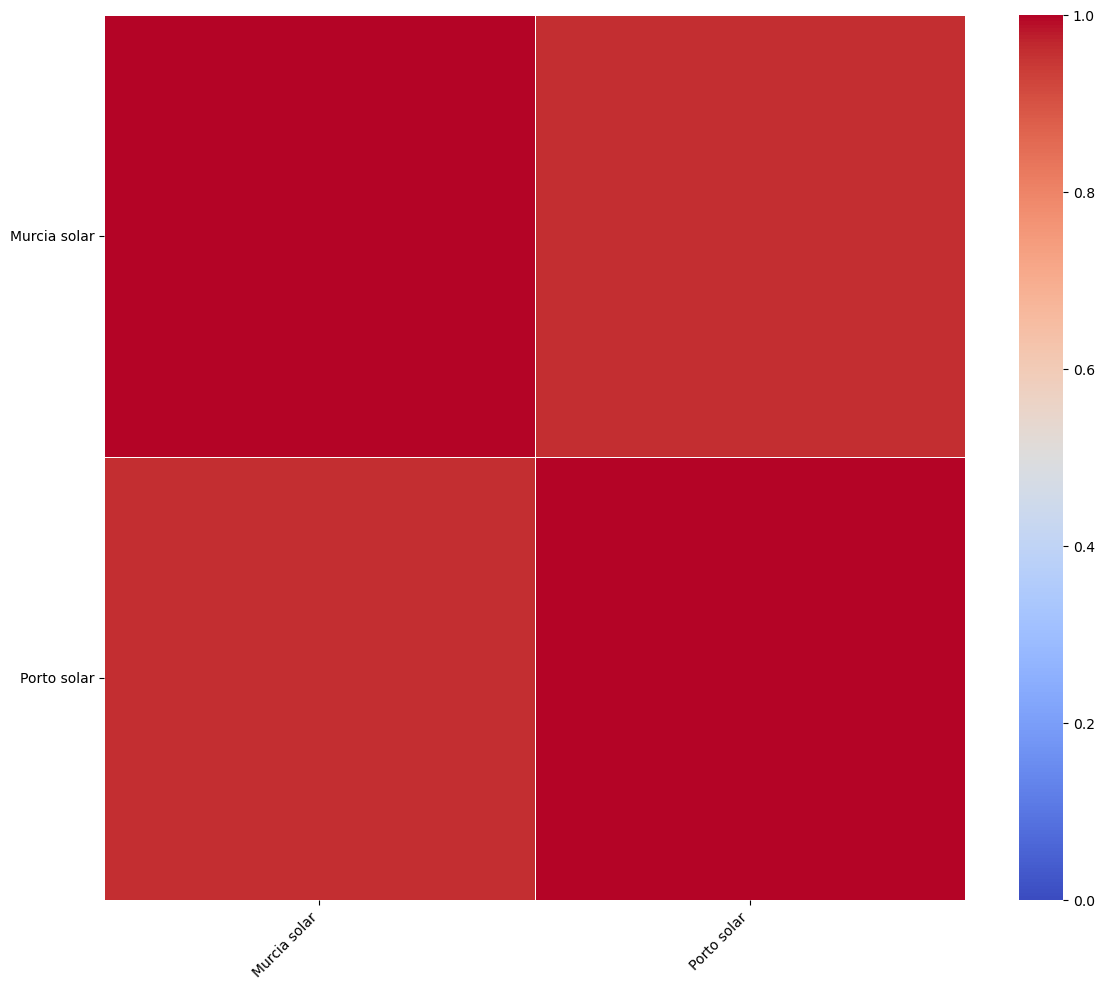

Correlation Matrix for Onwind Generators



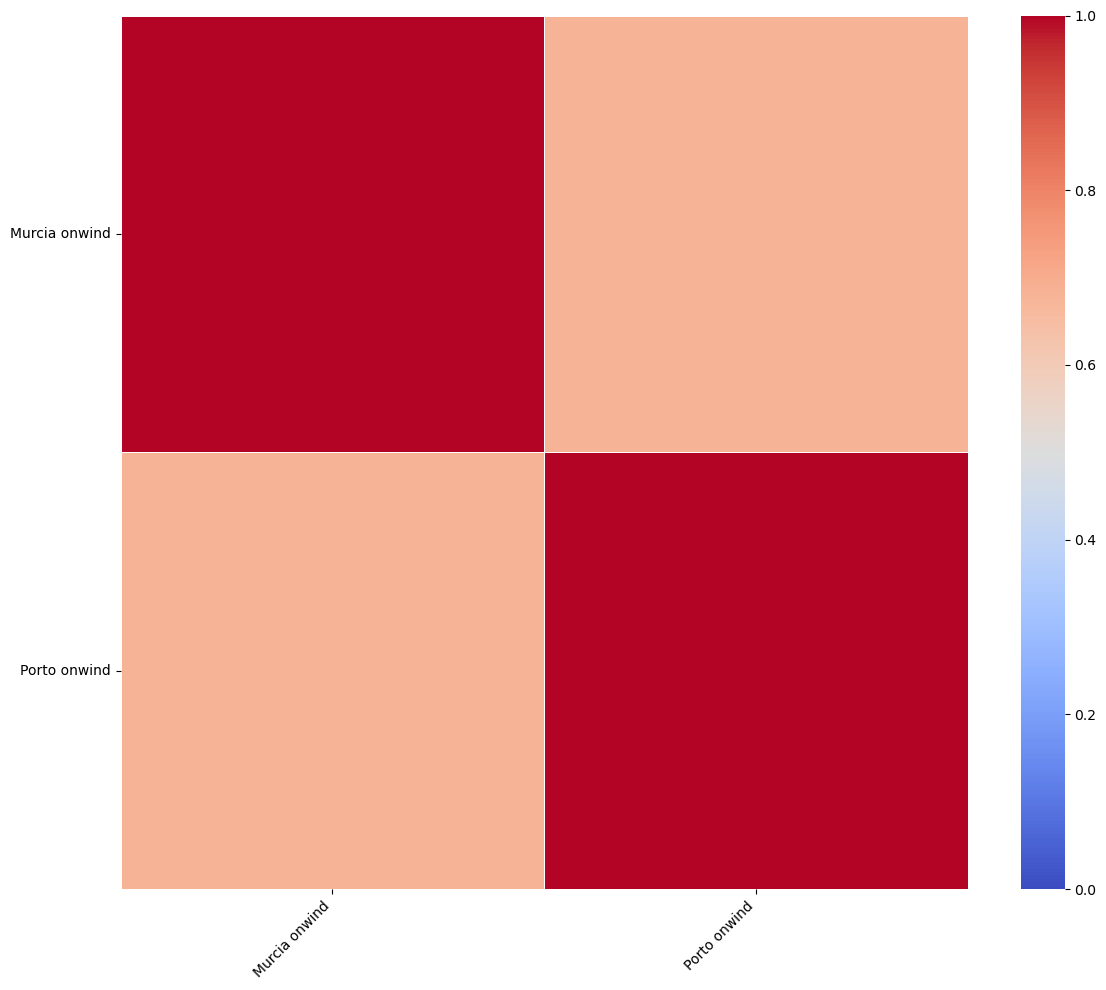

In [54]:
plotting.plot_correlation_matrix_carrier_by_carrier(
    capacity_factors, savefolder=capacity_factors_output_folder
)

Average Hourly Capacity Factors with ±1 standard deviation


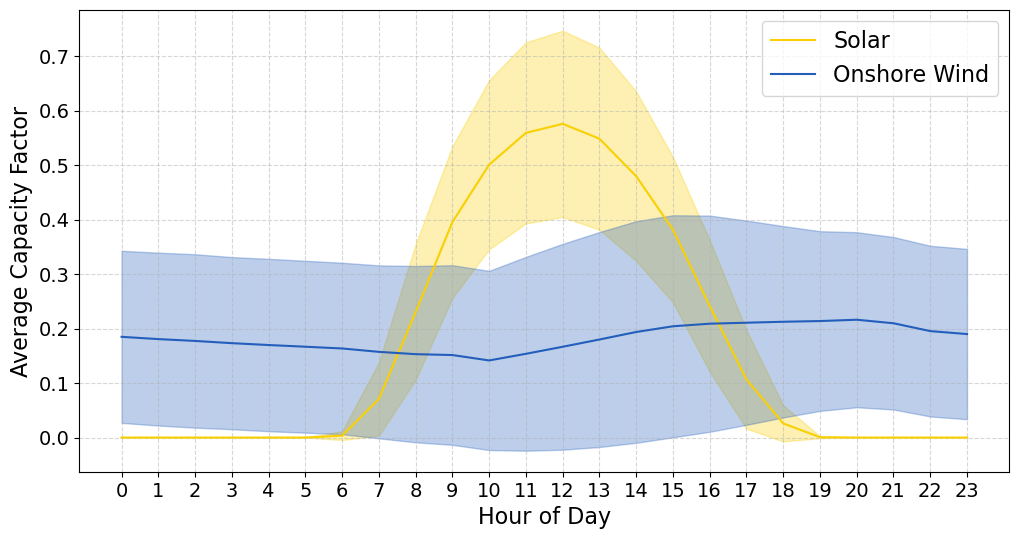

Average Monthly Capacity Factors with ±1 standard deviation


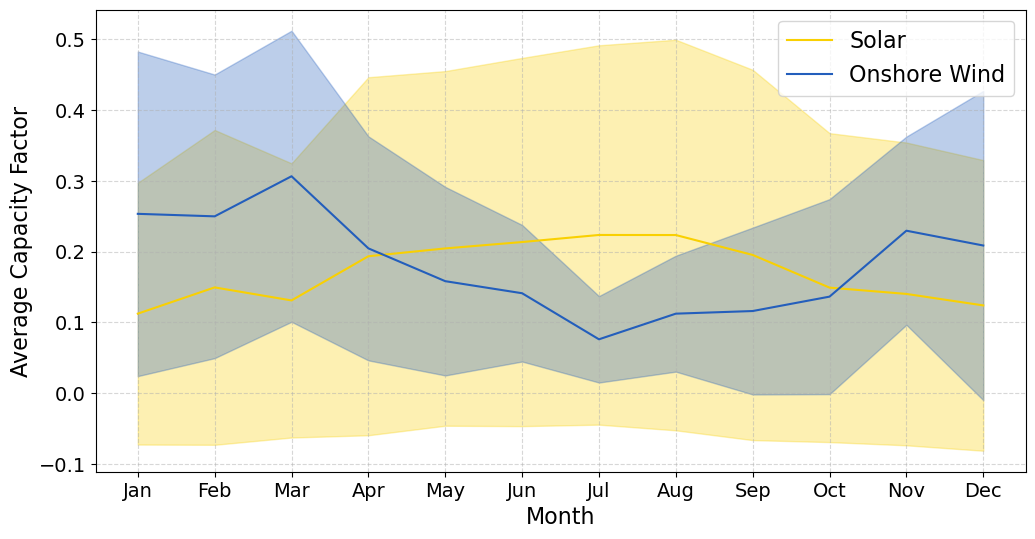

In [55]:
# Plot combined hourly and monthly averages.
plotting.plot_avg_hourly_capacity_factors(
    capacity_factors, generators, output_folder=capacity_factors_output_folder
)
plotting.plot_avg_monthly_capacity_factors(
    capacity_factors, generators, output_folder=capacity_factors_output_folder
)

Average Hourly Capacity Factors for solar with ±1 standard deviation


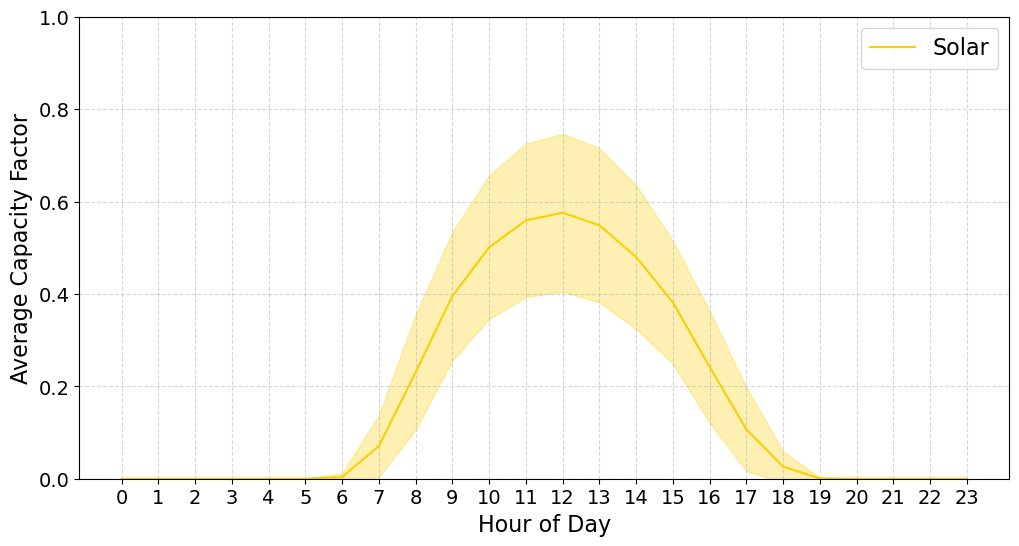

Average Hourly Capacity Factors for onwind with ±1 standard deviation


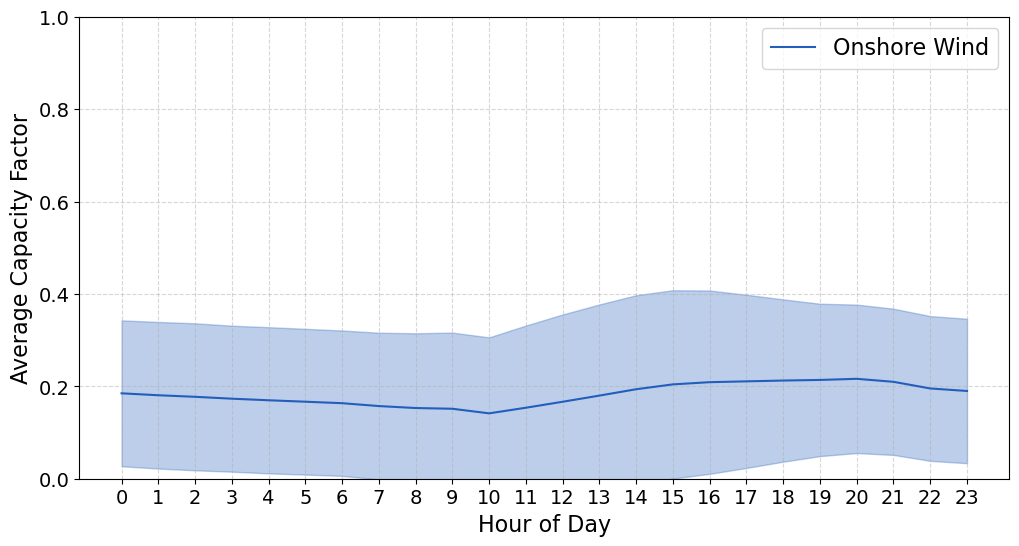

Average Monthly Capacity Factors for solar with ±1 standard deviation


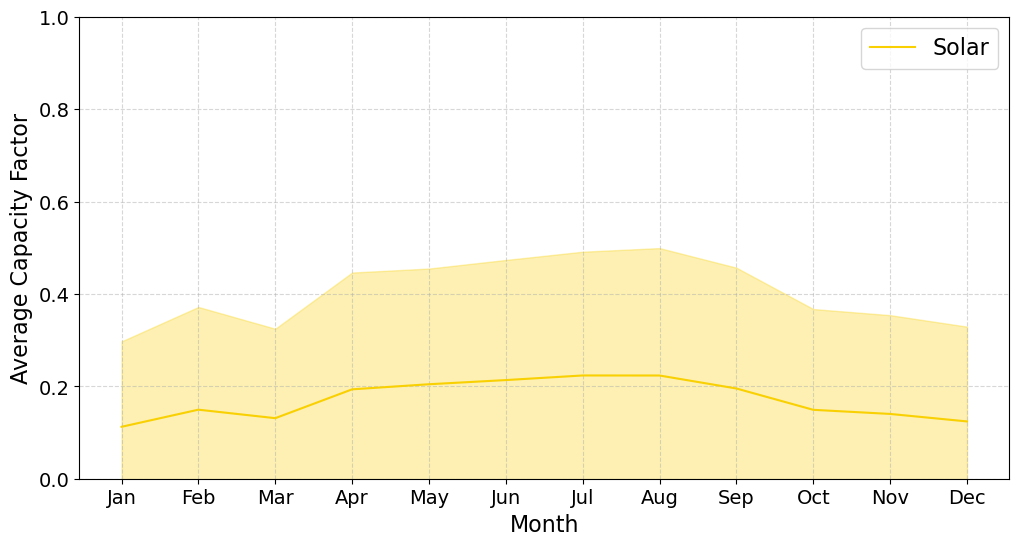

Average Monthly Capacity Factors for onwind with ±1 standard deviation


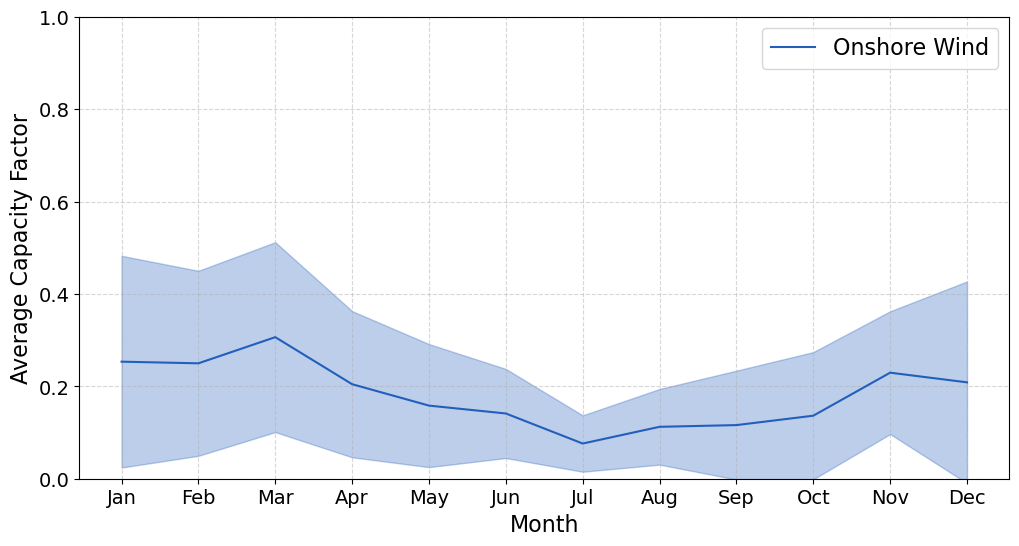

In [56]:
# Plot separate hourly and monthly figures for each generator type.
plotting.plot_avg_hourly_capacity_factors_sep(
    capacity_factors, generators, output_folder=capacity_factors_output_folder
)
plotting.plot_avg_monthly_capacity_factors_sep(
    capacity_factors, generators, output_folder=capacity_factors_output_folder
)

Heatmap of Solar capacity factors by hour of day and month


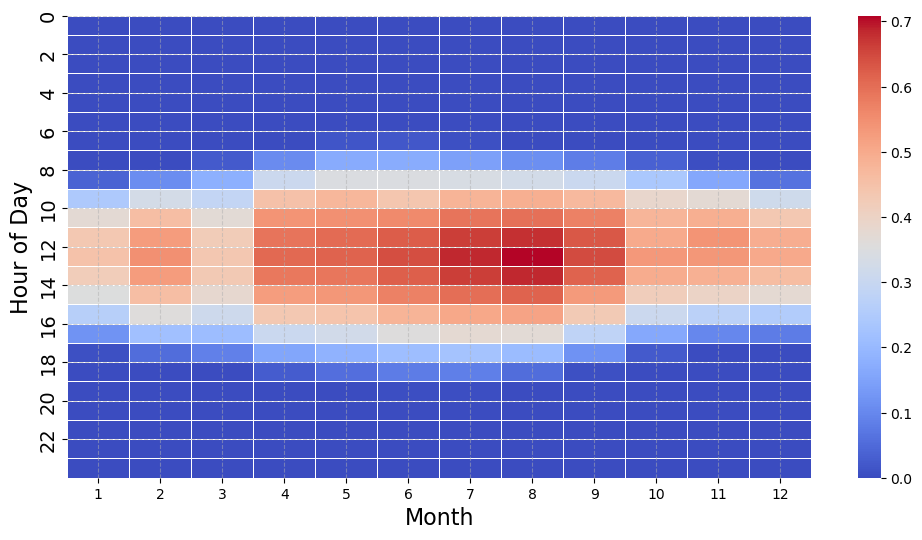

Heatmap of Onwind capacity factors by hour of day and month


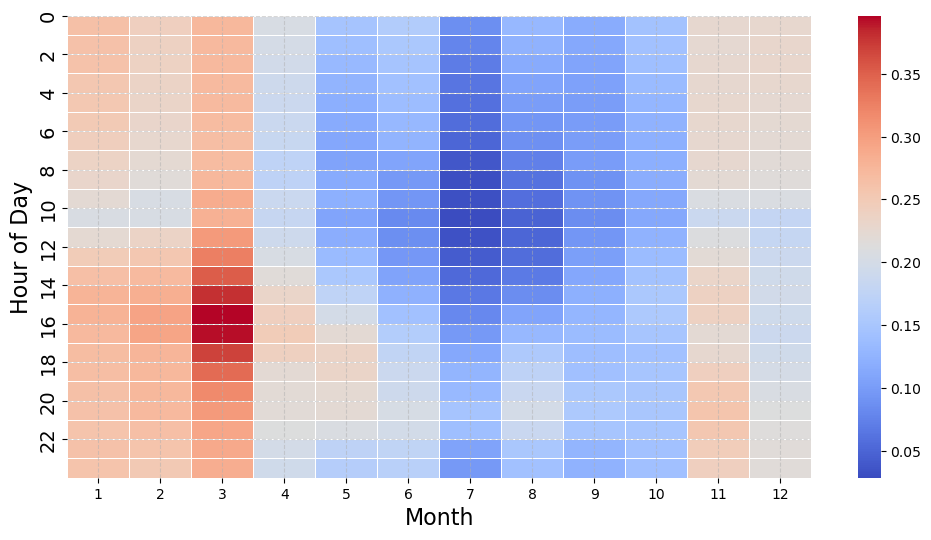

Average capacity factors by day of the week (aggregated over all generator types)


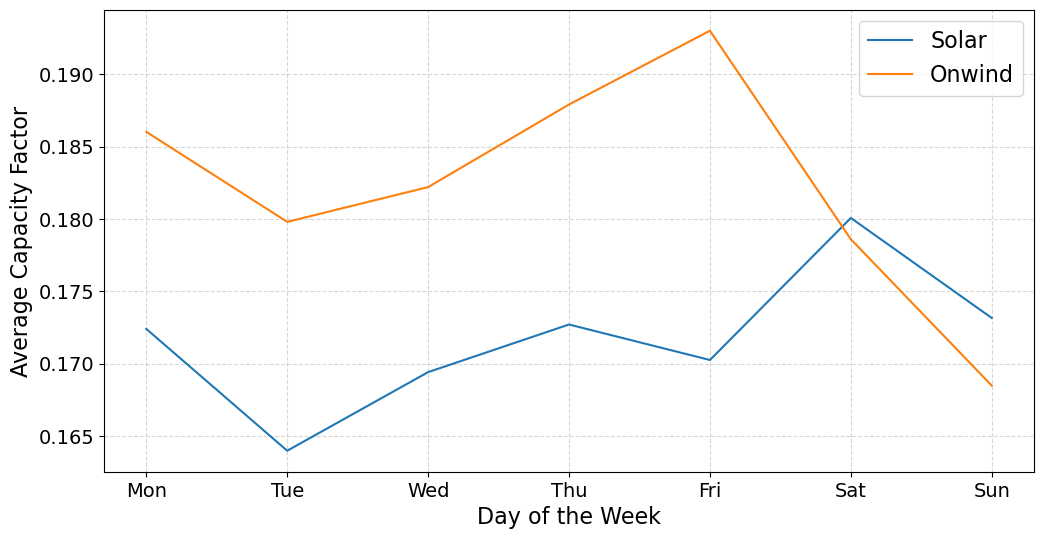

In [57]:
# Plot heatmaps and weekly averages.
plotting.plot_heatmap_capacity_factors(
    capacity_factors,
    use_global_limits=False,
    output_folder=capacity_factors_output_folder,
)
plotting.plot_avg_weekly_capacity_factors(
    capacity_factors,
    use_global_limits=False,
    output_folder=capacity_factors_output_folder,
)

Time series of capacity factors for all generator types with default axis scaling.


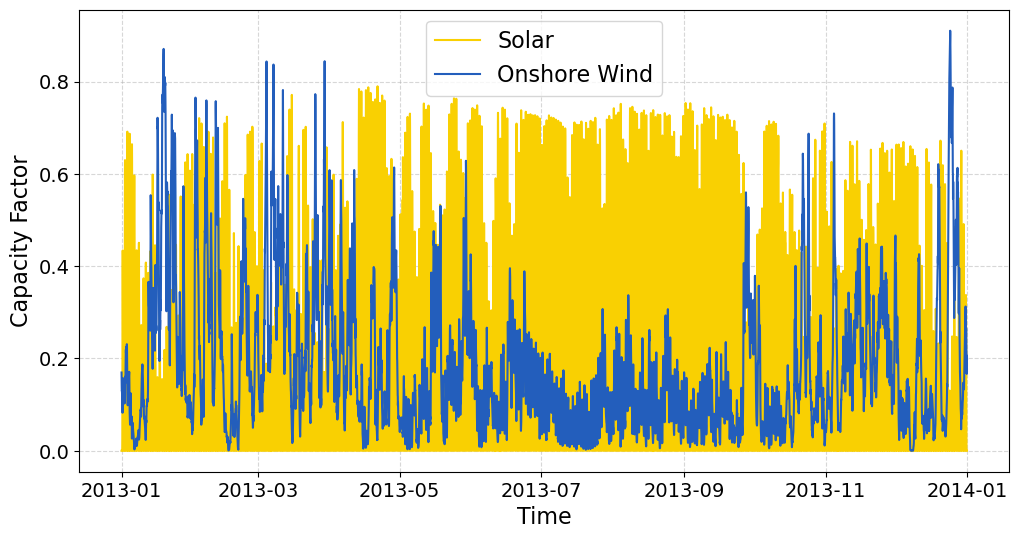

Time series of Solar capacity factors with default axis scaling.


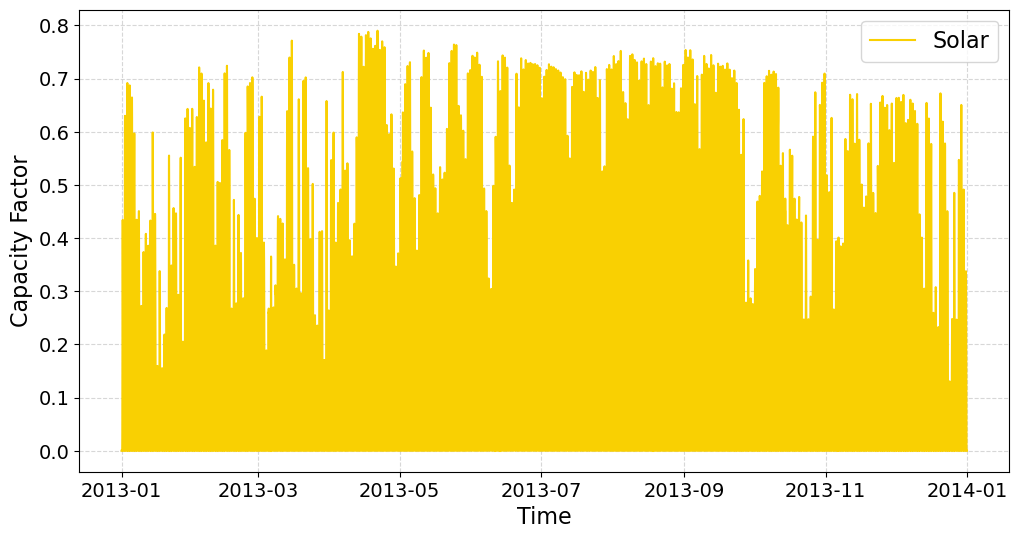

Time series of Onshore Wind capacity factors with default axis scaling.


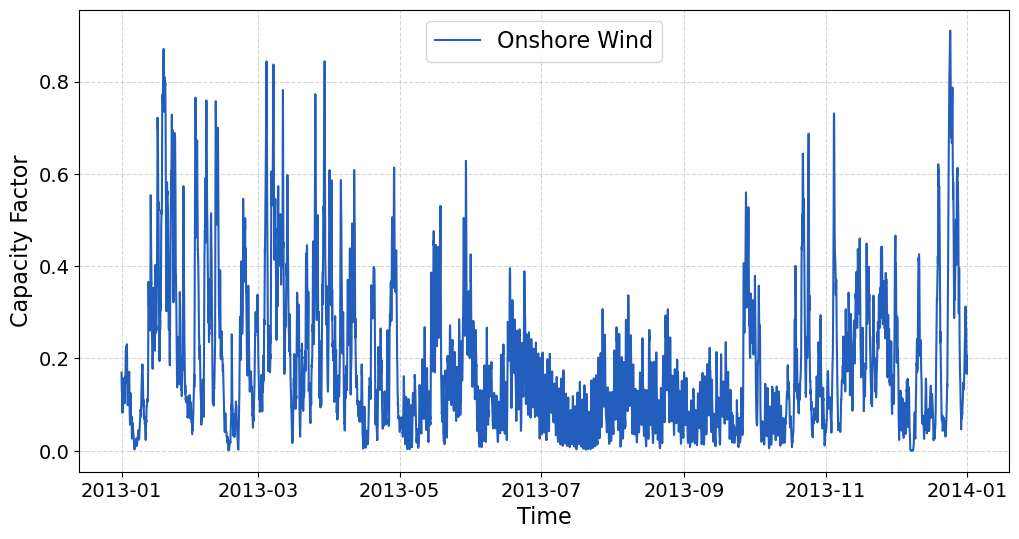

In [58]:
# Plot time series (combined and separate).
plotting.plot_timeseries_capacity_factors(
    capacity_factors,
    generators,
    use_global_limits=False,
    output_folder=capacity_factors_output_folder,
)
plotting.plot_timeseries_capacity_factors_sep(
    capacity_factors,
    generators,
    use_global_limits=False,
    output_folder=capacity_factors_output_folder,
)